# Weather analysis
The weather data used in this analysis was pulled from the World Bank Group's Climate Change Knowledge Portal on Feb 6, 2021. https://climateknowledgeportal.worldbank.org/download-data

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

### Import weather data and convert to a DataFrame for analysis
Historical data on temperature and rainfall was available for over 200 countries and downloadable as a csv report for selectable countries, and was not selectable by year. So we began with monthly data from 1991-2016, which had to be cleaned up to reduce the number of countries and eliminate years that were not of interest.

In [2]:
rains_df = pd.read_csv("Resources/world_rains.csv")
temps_df = pd.read_csv("Resources/world_temps.csv")
rains_df = rains_df.rename(columns={"Rainfall - (MM)": "Rainfall (mm)", " Year": "Year", " Statistics": "Statistics", 
                                    " Country": "Country", " ISO3": "ISO3"}) 
temps_df = temps_df.rename(columns={"Temperature - (Celsius)": "Temperature (C)", " Year": "Year", " Statistics": "Statistics", 
                                    " Country": "Country", " ISO3": "ISO3"}) 

#The weather dataset has data from 1991 - 2016.  Remove years that aren't 2015 or 2016
rains_df_2015 = rains_df.loc[(rains_df["Year"] == 2015), :]
rains_df_2016 = rains_df.loc[(rains_df["Year"] == 2016), :]
temps_df_2015 = temps_df.loc[(temps_df["Year"] == 2015), :]
temps_df_2016 = temps_df.loc[(temps_df["Year"] == 2016), :]

# We just want one value for rainfall and temp per year per country.

# Find mean rainfall and temperature by country by year, then
# Make one dataframe for 2015 and one for 2016 to match the happiness dataframes for merging later.
# The csvs have leading spaces in front of the country names, so also need to strip that whitespace  
# for the merge to work.

r_2015_g = rains_df_2015.groupby("Country")
r_2016_g = rains_df_2016.groupby("Country")

t_2015_g = temps_df_2015.groupby("Country")
t_2016_g = temps_df_2016.groupby("Country")

simple_2015 = r_2015_g.mean()
simple_2016 = r_2016_g.mean()

t_simple_2015 = t_2015_g.mean()
t_simple_2016 = t_2016_g.mean()

simple_2015["Temp"] = t_simple_2015["Temperature (C)"]
del simple_2015["Year"]
simple_2015_wx = simple_2015.reset_index()
simple_2015_wx["Country"] = simple_2015_wx["Country"].str.strip()

simple_2016["Temp"] = t_simple_2016["Temperature (C)"]
del simple_2016["Year"]
simple_2016_wx = simple_2016.reset_index()
simple_2016_wx["Country"] = simple_2016_wx["Country"].str.strip()

simple_2015_wx.head()

,Country,Rainfall (mm),Temp
0,Afghanistan,33.449854,13.866922
1,Albania,78.137235,12.685259
2,Algeria,6.511808,23.656875
3,Andorra,50.934788,12.573667
4,Angola,75.087551,22.260433


### Import World Happiness Data and merge with Weather Data

In [3]:
# 2015 World Happiness Data import to dataframe and format
h_2015_df = pd.read_csv("Resources/2015.csv")
h_2015_df.head()
del h_2015_df["Standard Error"]
del h_2015_df["Dystopia Residual"]
#h_2015_df.head()

In [4]:
# 2016 World Happiness Data import to dataframe and format
h_2016_df = pd.read_csv("Resources/2016.csv")
h_2016_df.head()
del h_2016_df["Lower Confidence Interval"]
del h_2016_df["Upper Confidence Interval"]
del h_2016_df["Dystopia Residual"]
#h_2016_df.head()

In [5]:
#The Merge
both_df_2015 = pd.merge(h_2015_df,simple_2015_wx,how="inner",on="Country")
both_df_2015.head()

both_df_2016 = pd.merge(h_2016_df,simple_2016_wx,how="inner",on="Country")
both_df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Rainfall (mm),Temp
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,56.890975,9.056102
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,137.437713,7.135720
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,101.170875,3.206224
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,86.112425,2.264043
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,52.059850,3.104377


### Visualizations - are weather and happiness correlated?

y = -2.6x + 32.66


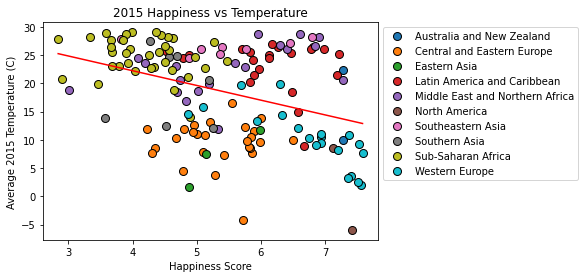

In [66]:
#group by region
by_regions_2015 = both_df_2015.groupby("Region")
by_regions_2016 = both_df_2016.groupby("Region")

for index, group in by_regions_2015: 

    ax = plt.plot(group["Happiness Score"], group["Temp"], marker="o", linestyle="", 
             label=index, markersize=8, markeredgecolor="black")
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    
x_values = both_df_2015['Happiness Score']
y_values = both_df_2015['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.plot(x_values,regress_values,"r-")
plt.title('2015 Happiness vs Temperature')
plt.xlabel('Happiness Score')
plt.ylabel('Average 2015 Temperature (C)')
plt.savefig('2015_Happy_Temp')


No strong linear trend for this comparison, but as a southerner, I find it surprising that countries with annual average temperatures at or below freezing tend to have higher than average happiness scores.

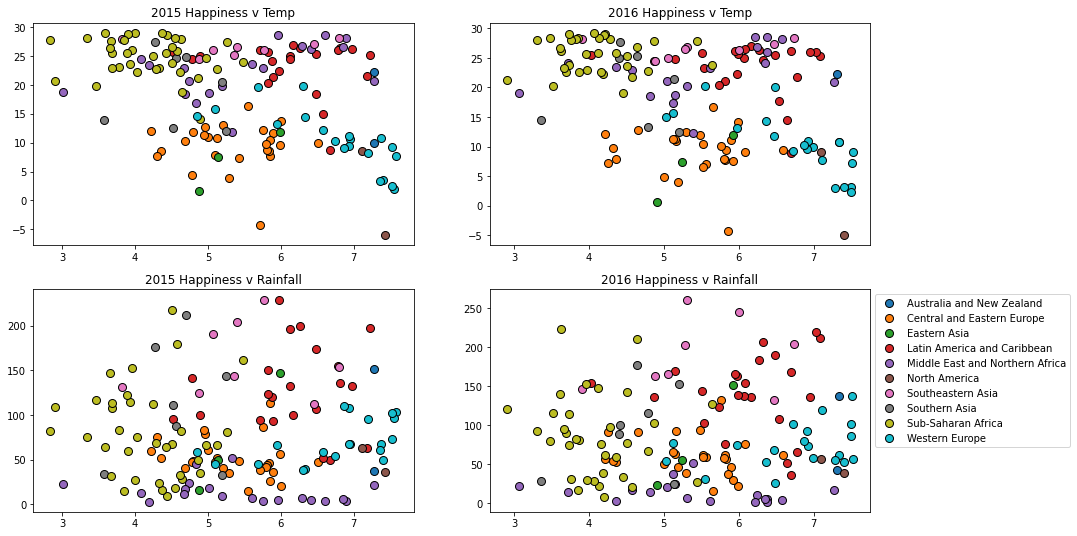

In [67]:
#Now create plots for 2016, and for rainfall
fig, axs = plt.subplots(2, 2, figsize=(15,9))

for index, group in by_regions_2015: 
    axs[0, 0].plot(group["Happiness Score"], group["Temp"], marker="o", linestyle="", 
             label=index, markersize=8, markeredgecolor="black")
axs[0, 0].set_title("2015 Happiness v Temp")

for index, group in by_regions_2016: 
    axs[0, 1].plot(group["Happiness Score"], group["Temp"], marker="o", linestyle="", 
             label=index, markersize=8, markeredgecolor="black")
axs[0, 1].set_title("2016 Happiness v Temp")

for index, group in by_regions_2015: 
    axs[1, 0].plot(group["Happiness Score"], group["Rainfall (mm)"], marker="o", linestyle="", 
             label=index, markersize=8, markeredgecolor="black")
axs[1, 0].set_title("2015 Happiness v Rainfall")

for index, group in by_regions_2016: 
    axs[1, 1].plot(group["Happiness Score"], group["Rainfall (mm)"], marker="o", linestyle="", 
             label=index, markersize=8, markeredgecolor="black")
axs[1, 1].set_title("2016 Happiness v Rainfall")

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.savefig("HappyRainTemp")

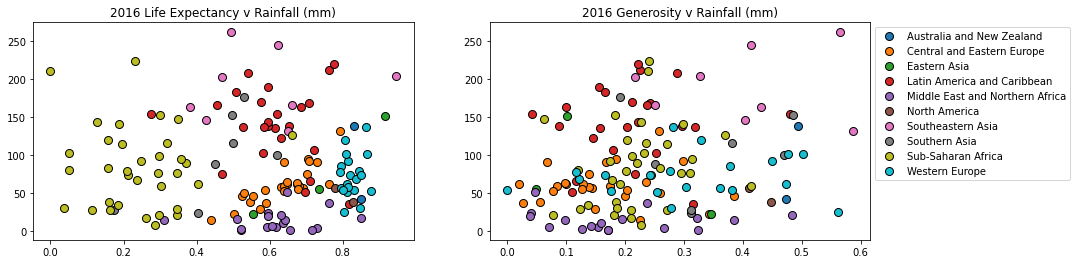

In [65]:
# Just for fun, plot rainfall against two of the other measures.

fig, axs = plt.subplots(1, 2, figsize=(15,4))
for index, group in by_regions_2016: 
    axs[0].plot(group["Health (Life Expectancy)"], group["Rainfall (mm)"], marker="o", linestyle="", 
             label=index, markersize=8, markeredgecolor="black")
axs[0].set_title("2016 Life Expectancy v Rainfall (mm)")

for index, group in by_regions_2016: 
    axs[1].plot(group["Generosity"], group["Rainfall (mm)"], marker="o", linestyle="", 
             label=index, markersize=8, markeredgecolor="black")
axs[1].set_title("2016 Generosity v Rainfall (mm)")

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

plt.savefig("Life_Gen_Rain")

Again, the data is pretty scattered, but there are some interesting regional clusters in the Life Expectancy one.  SE Asia generally appears to have higher amounts of rain, but only moderate life expectancy scores.  Central and Eastern Europe appears to display a positive correlation between more rain and longer life.